# SVM  (Support Vector Machine)

**Support Vector Machines** are based on the concept of decision planes that define decision boundaries. A decision plane is one that separates between a set of objects having different class memberships.

<img src="files/SVMIntro1.gif"/>

1.**Identify the right hyper-plane (Scenario-1):** Here, we have three hyper-planes (A, B and C). Now, identify the right hyper-plane to classify star and circle.
<img src="files/svm1.png" />
* You need to remember a thumb rule to identify the right hyper-plane: “Select the hyper-plane which segregates the two classes better”. In this scenario, hyper-plane “B” has excellently performed this job.

2.**Identify the right hyper-plane (Scenario-2):** Here, we have three hyper-planes (A, B and C) and all are segregating the classes well. Now, How can we identify the right hyper-plane?
<img src="files/svm2.png" /> 

* Here, maximizing the distances between nearest data point (either class) and hyper-plane will help us to decide the right hyper-plane. This distance is called as Margin. Let’s look at the below snapshot:

<img src="files/svm3.png"/>

* Above, you can see that the margin for hyper-plane C is high as compared to both A and B. Hence, we name the right hyper-plane as C. Another lightning reason for selecting the hyper-plane with higher margin is robustness. If we select a hyper-plane having low margin then there is high chance of miss-classification.

3.**Identify the right hyper-plane (Scenario-3):** 
<img src="files/svm4.png"/>
Some of you may have selected the hyper-plane B as it has higher margin compared to A. But, here is the catch, SVM selects the hyper-plane which classifies the classes accurately prior to maximizing margin. Here, hyper-plane B has a classification error and A has classified all correctly. Therefore, the right hyper-plane is A.


4.**Can we classify two classes (Scenario-4)?:** Below, I am unable to segregate the two classes using a straight line, as one of star lies in the territory of other(circle) class as an outlier. 
<img src="files/svm5.png"/>
As I have already mentioned, one star at other end is like an outlier for star class. SVM has a feature to ignore outliers and find the hyper-plane that has maximum margin. Hence, we can say, SVM is robust to outliers.
<img src="files/svm6.png" />

5.**Find the hyper-plane to segregate to classes (Scenario-5):** In the scenario below, we can’t have linear hyper-plane between the two classes, so how does SVM classify these two classes? Till now, we have only looked at the linear hyper-plane.
<img src="files/svm7.png" /> 
can solve this problem. Easily! It solves this problem by introducing additional feature. Here, we will add a new feature z=x^2+y^2. Now, let’s plot the data points on axis x and z:
<img src="files/svm8.png" />
In above plot, points to consider are:
* All values for z would be positive always because z is the squared sum of both x and y
* In the original plot, red circles appear close to the origin of x and y axes, leading to lower value of z and star relatively away from the origin result to higher value of z.

### Kernel Trick:
* Kernel Trick is a SVM technique which takes low dimensional input space and transform it to a higher dimensional space i.e. it converts not separable problem to separable problem, these functions are called kernels. It is mostly useful in non-linear separation problem. Simply put, it does some extremely complex data transformations, then find out the process to separate the data based on the labels or outputs you’ve defined.
> kernel is essentially a mapping function - one that transforms a given space into some other (usually very high dimensional) space. 

<img src="files/svm12.png"/>

How kernel transform input space : https://www.youtube.com/watch?v=3liCbRZPrZA

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
x_data = ((np.random.rand(100) - 0.5)*6.56).astype(np.float32)
y_data = (2*(x_data * 0.1459 + 0.04567 > 0) - 1.).astype(np.float32)

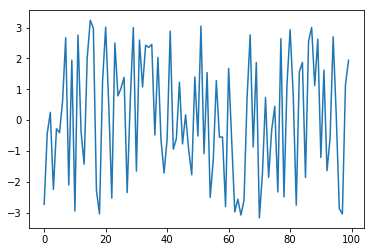

In [6]:
plt.plot(x_data)

In [ ]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
yp = W*x_data + b
loss =   tf.reduce_mean(tf.maximum(0., (1 - tf.mul(y_data, yp) ))) + tf.reduce_sum(tf.square(W))

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(0.09)
train = optimizer.minimize(loss)
sess = tf.Session()

In [ ]:
sess.run(tf.initialize_all_variables())

In [ ]:
train = optimizer.minimize(loss)
for i in range(10000):
    sess.run(train)

References:
* Analytic Vidya SVM tutorials https://www.analyticsvidhya.com/blog/2015/10/understaing-support-vector-machine-example-code/